In [1]:
import numpy as np
import pandas as pd
import seaborn as sn 
from tqdm import tqdm
import matplotlib.pyplot as plt

# Importing the dataset into jupter notebook

In [2]:
data=pd.read_csv("cardio_train.csv")

# Describing the data with info on basic statistic

In [3]:
x=data.describe()
x.transpose()

,count,mean,std,min,25%,50%,75%,max
age(years),70000.0,53.339349,6.759573,29.58,48.39,53.98,58.43,64.97
gender,70000.0,1.349571,0.476838,1.00,1.00,1.00,2.00,2.00
height,70000.0,164.359229,8.210126,55.00,159.00,165.00,170.00,250.00
weight,70000.0,74.205690,14.395757,10.00,65.00,72.00,82.00,200.00
Systolic blood pressure,70000.0,128.817286,154.011419,-150.00,120.00,120.00,140.00,16020.00
Diastolic blood pressure,70000.0,96.630414,188.472530,-70.00,80.00,80.00,90.00,11000.00
cholesterol,70000.0,1.366871,0.680250,1.00,1.00,1.00,2.00,3.00
glucose,70000.0,1.226457,0.572270,1.00,1.00,1.00,1.00,3.00
smoke,70000.0,0.088129,0.283484,0.00,0.00,0.00,0.00,1.00
alcohol,70000.0,0.053771,0.225568,0.00,0.00,0.00,0.00,1.00


# Checking for null value

In [4]:
data.isnull().sum()

age(years)                  0
gender                      0
height                      0
weight                      0
Systolic blood pressure     0
Diastolic blood pressure    0
cholesterol                 0
glucose                     0
smoke                       0
alcohol                     0
Physical active             0
cardiovascular disease      0
dtype: int64

# Providing detail on data types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age(years)                70000 non-null  float64
 1   gender                    70000 non-null  int64  
 2   height                    70000 non-null  int64  
 3   weight                    70000 non-null  float64
 4   Systolic blood pressure   70000 non-null  int64  
 5   Diastolic blood pressure  70000 non-null  int64  
 6   cholesterol               70000 non-null  int64  
 7   glucose                   70000 non-null  int64  
 8   smoke                     70000 non-null  int64  
 9   alcohol                   70000 non-null  int64  
 10  Physical active           70000 non-null  int64  
 11  cardiovascular disease    70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


# Making the column reabable by using proper syntax
# finding the unique varible for encoding purposes

In [6]:
data.columns = data.columns.str.replace(' ','_')
data.columns = data.columns.str.replace('(','_')
data.columns = data.columns.str.replace(')','_')
for col in tqdm(data.columns):
    if data[col].dtype == 'int64':
        print(col , ":", data[col].nunique())
    elif data[col].dtype == 'float64':
        print(col , ":", data[col].nunique())

100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 601.74it/s]

age_years_ : 2398
gender : 2
height : 109
weight : 287
Systolic_blood_pressure : 153
Diastolic_blood_pressure : 157
cholesterol : 3
glucose : 3
smoke : 2
alcohol : 2
Physical_active : 2
cardiovascular_disease : 2


# Finding correlation between the variable

In [7]:
heartdata_corr=data.corr()
data.corr()

,age_years_,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,Physical_active,cardiovascular_disease
age_years_,1.000000,-0.022812,-0.081516,0.053682,0.020764,0.017647,0.154426,0.098703,-0.047632,-0.029724,-0.009925,0.238159
gender,-0.022812,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081516,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053682,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
Systolic_blood_pressure,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
Diastolic_blood_pressure,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154426,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
glucose,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047632,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alcohol,-0.029724,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


# Data visulaization of correlation using heat map

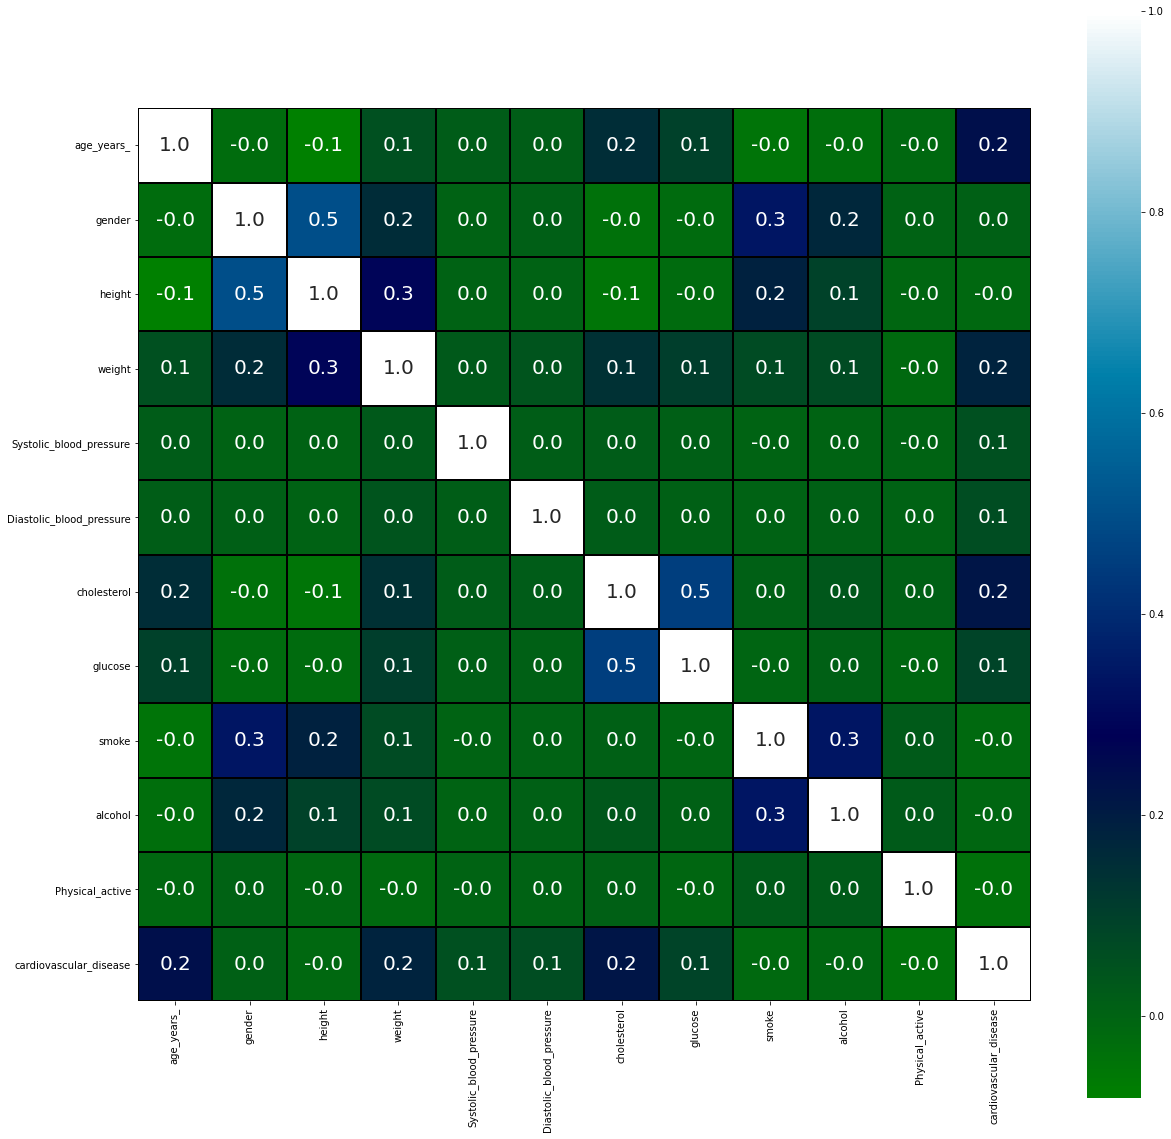

In [8]:
fig, ax = plt.subplots(figsize=(20,20))

sn.heatmap(heartdata_corr,ax=ax,annot=True,cmap="ocean",annot_kws={"size": 20},fmt=".1f",linewidths=1,linecolor='black',square=True);

# Cleaning the outliers (using blood pressure and physical attribue)

In [7]:
x=["age_years_","height","weight","Systolic_blood_pressure","Diastolic_blood_pressure"]
eval_data=data.drop(["age_years_","gender","cholesterol","glucose","smoke","alcohol","Physical_active","cardiovascular_disease"],axis=1)
Q1 = eval_data.quantile(0.25)
Q3 = eval_data.quantile(0.75)
IQR = Q3 - Q1
data_clean = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_clean

,age_years_,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,Physical_active,cardiovascular_disease
0,50.39,2,168,62.0,110,80,1,1,0,0,1,0
1,55.42,1,156,85.0,140,90,3,1,0,0,1,1
2,51.66,1,165,64.0,130,70,3,1,0,0,0,1
3,48.28,2,169,82.0,150,100,1,1,0,0,1,1
5,60.04,1,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53.97,1,172,70.0,130,90,1,1,0,0,1,1
69994,57.74,1,165,80.0,150,80,1,1,0,0,1,1
69995,52.71,2,168,76.0,120,80,1,1,1,0,1,0
69998,61.45,1,163,72.0,135,80,1,2,0,0,0,1


# Presenting a seperate dataset for outlier

In [8]:
data_out = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out

,age_years_,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,Physical_active,cardiovascular_disease
4,47.87,1,156,56.0,100,60,1,1,0,0,0,0
9,54.34,1,164,68.0,110,60,1,1,0,0,0,0
15,45.98,2,172,112.0,120,80,1,1,0,0,0,1
23,64.04,2,156,45.0,110,60,1,1,0,0,1,0
43,56.32,2,159,63.0,120,60,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69967,58.67,2,168,63.0,140,1000,1,1,0,0,1,1
69978,51.51,1,163,78.0,90,60,1,1,0,0,1,1
69981,47.95,2,182,110.0,130,90,2,2,0,0,1,1
69996,61.92,1,158,126.0,140,90,2,2,0,0,1,1


# Box Plot is used to visualize outliers

<AxesSubplot:xlabel='Systolic_blood_pressure'>

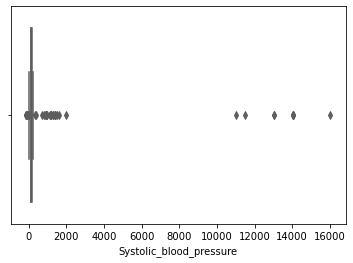

In [11]:
sn.boxplot(x=data_out.Systolic_blood_pressure,palette="Greens")

<AxesSubplot:xlabel='weight'>

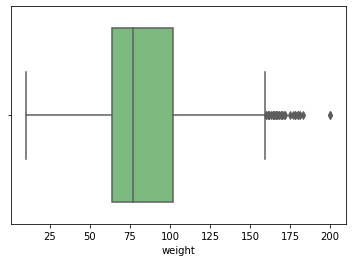

In [12]:

sn.boxplot(x=data_out.weight,palette="Greens")

<AxesSubplot:xlabel='Diastolic_blood_pressure'>

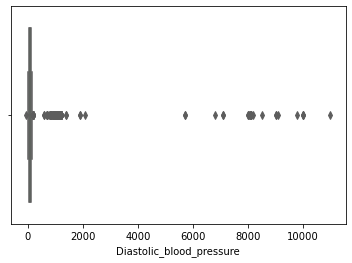

In [13]:
sn.boxplot(x=data_out.Diastolic_blood_pressure,palette="Greens")


<AxesSubplot:xlabel='height'>

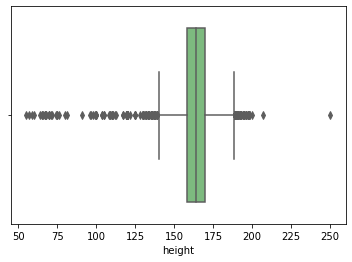

In [14]:
sn.boxplot(x=data_out.height,palette="Greens")

In [15]:
data.head(5)

,age_years_,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,Physical_active,cardiovascular_disease
0,50.39,2,168,62.0,110,80,1,1,0,0,1,0
1,55.42,1,156,85.0,140,90,3,1,0,0,1,1
2,51.66,1,165,64.0,130,70,3,1,0,0,0,1
3,48.28,2,169,82.0,150,100,1,1,0,0,1,1
4,47.87,1,156,56.0,100,60,1,1,0,0,0,0


# Data visualization

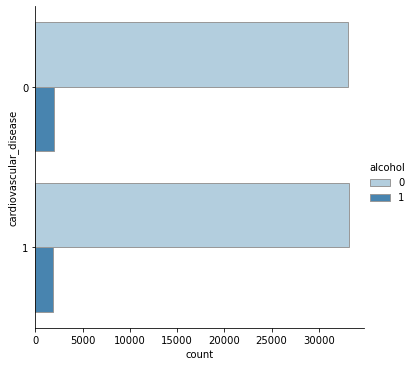

In [16]:
sn.catplot(y="cardiovascular_disease",hue="alcohol",kind="count",palette="Blues",edgecolor=".6",data=data)

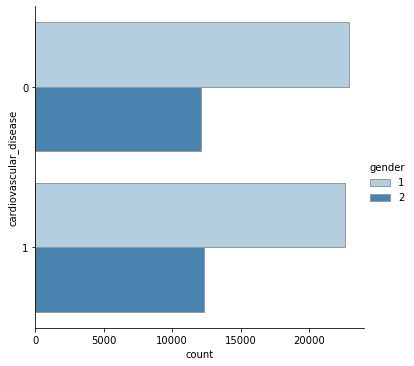

In [80]:
sn.catplot(y="cardiovascular_disease",hue="gender",kind="count",palette="Blues",edgecolor=".6",data=data)

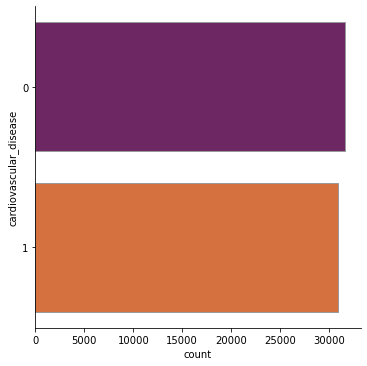

In [78]:
sn.catplot(y="cardiovascular_disease",kind="count",palette="inferno",edgecolor=".6",data=data_clean)

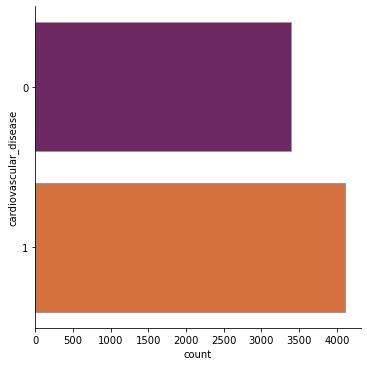

In [79]:
sn.catplot(y="cardiovascular_disease",kind="count",palette="inferno",edgecolor=".6",data=data_out)

<AxesSubplot:xlabel='cardiovascular_disease', ylabel='Density'>

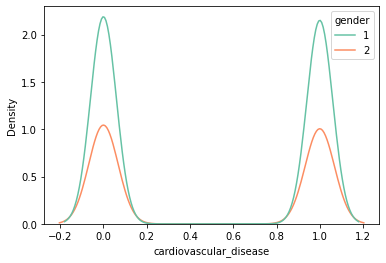

In [31]:
sn.kdeplot(data=data_clean, x="cardiovascular_disease", hue="gender",palette="Set2")

<AxesSubplot:xlabel='cardiovascular_disease', ylabel='Density'>

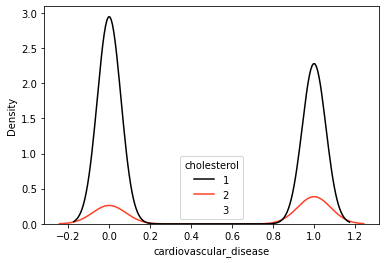

In [69]:
sn.kdeplot(data=data_clean, x="cardiovascular_disease", hue="cholesterol",palette="CMRmap")

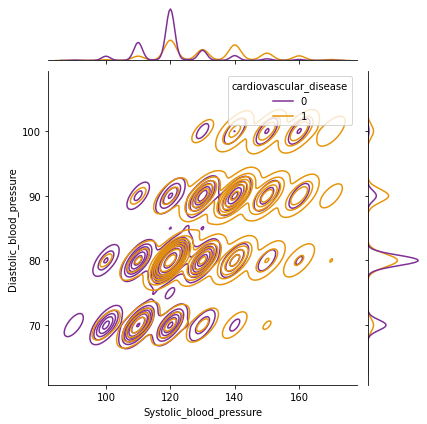

In [71]:

sn.jointplot(data=data_clean, x="Systolic_blood_pressure", y="Diastolic_blood_pressure", hue="cardiovascular_disease",kind='kde',palette="CMRmap")

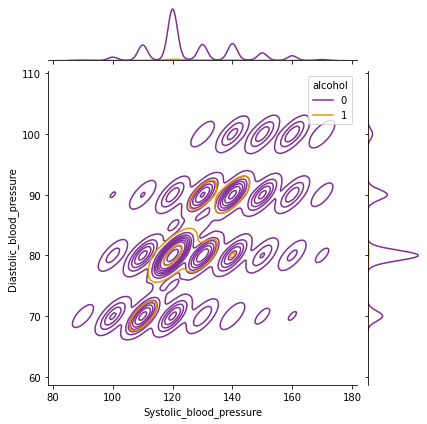

In [70]:
sn.jointplot(data=data_clean, x="Systolic_blood_pressure", y="Diastolic_blood_pressure", hue="alcohol",kind='kde',palette="CMRmap")

In [ ]:
sn.jointplot(data=data_clean, x="Systolic_blood_pressure", y="Diastolic_blood_pressure", hue="cardiovascular_disease",kind='kde')

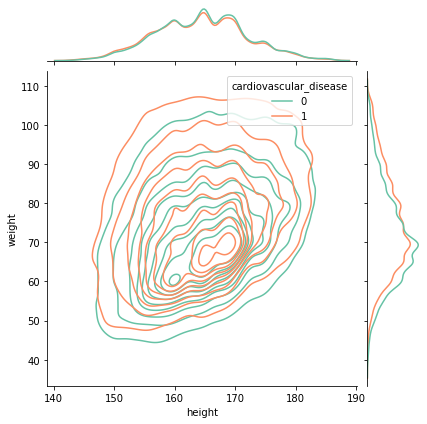

In [33]:
sn.jointplot(data=data_clean, x="height", y="weight", hue="cardiovascular_disease",kind='kde',palette="Set2")

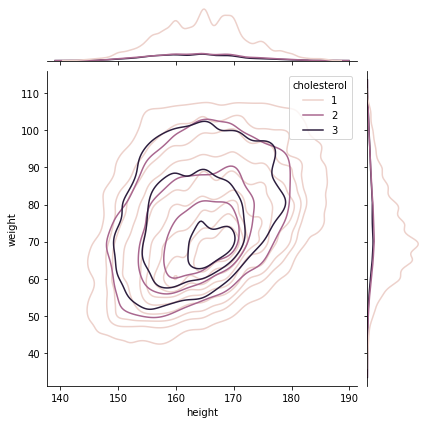

In [36]:
sn.jointplot(data=data_clean, x="height", y="weight", hue="cholesterol",kind='kde')

In [10]:
x=data_clean["age_years_"]
x=round(x)
x

0        50.0
1        55.0
2        52.0
3        48.0
5        60.0
         ... 
69993    54.0
69994    58.0
69995    53.0
69998    61.0
69999    56.0
Name: age_years_, Length: 62505, dtype: float64

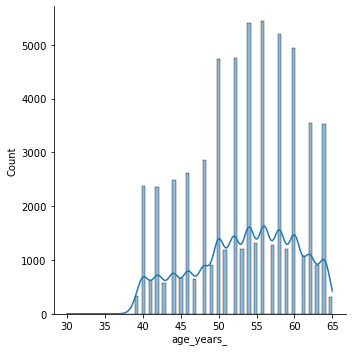

In [11]:
sn.displot(data=x, kde=True)

<AxesSubplot:xlabel='age_years_', ylabel='Density'>

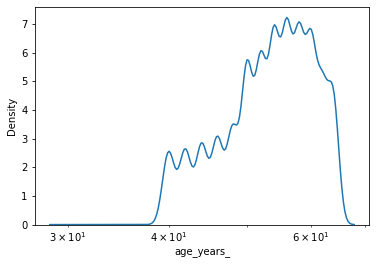

In [16]:
sn.kdeplot(data=data_clean, x="age_years_", log_scale=True)

<AxesSubplot:xlabel='age_years_', ylabel='Density'>

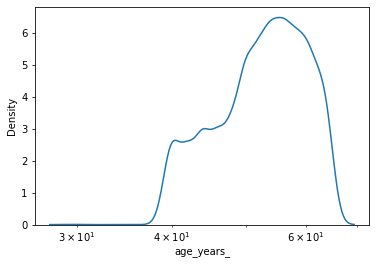

In [17]:
sn.kdeplot(data=data_out, x="age_years_", log_scale=True)

<AxesSubplot:xlabel='weight', ylabel='height'>

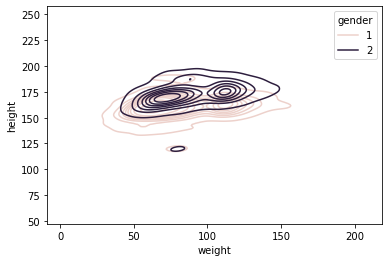

In [20]:
sn.kdeplot(data=data_out, x="weight", y="height", hue="gender")

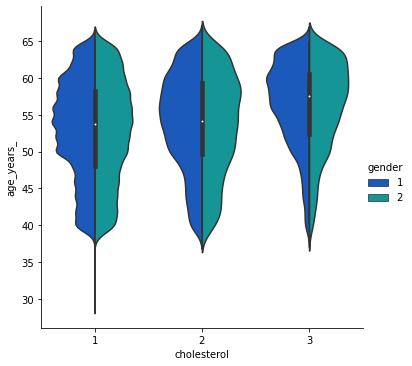

In [48]:
sn.catplot(x='cholesterol',y='age_years_',split=True,kind='violin',hue='gender',data=data_clean,palette='winter');

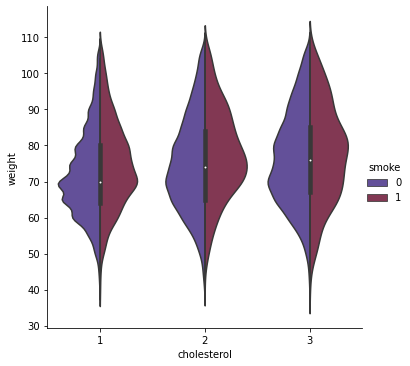

In [51]:
sn.catplot(x='cholesterol',y='weight',split=True,kind='violin',hue='smoke',data=data_clean,palette='twilight');

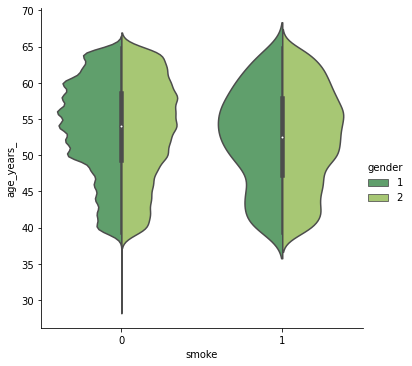

In [52]:
sn.catplot(x='smoke',y='age_years_',split=True,kind='violin',hue='gender',data=data_clean,palette='summer');

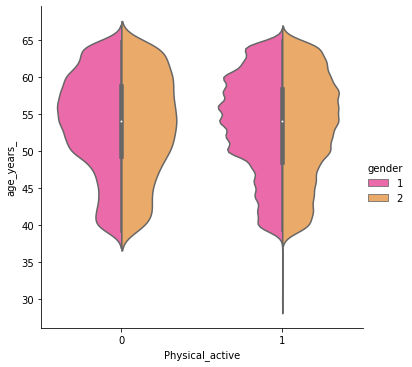

In [53]:
sn.catplot(x='Physical_active',y='age_years_',split=True,kind='violin',hue='gender',data=data_clean,palette='spring');

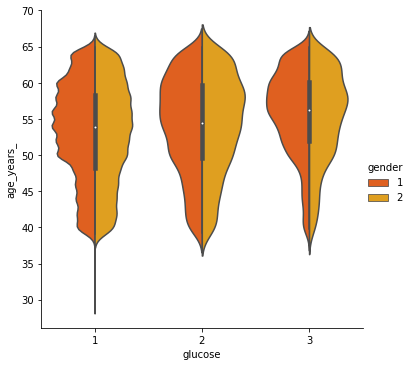

In [54]:
sn.catplot(x='glucose',y='age_years_',split=True,kind='violin',hue='gender',data=data_clean,palette='autumn');

# Model Building

# Logistics

In [10]:
# converting numerical value into catergorical
y=[]
for x in data.Systolic_blood_pressure:
    if x <= 120:
        y.append(1)
    elif x> 120 and x<=130:
        y.append(2)
    elif x> 130 and x<=140:
        y.append(3)
    elif x> 140 and x<=180:
        y.append(4)
    elif x> 180:
        y.append(5)
df=pd.DataFrame({'Systolic_blood_pressure_cat':y})
data['Systolic_blood_pressure_cat']=df

In [11]:
y=[]
for x in data.Diastolic_blood_pressure:
    if x <= 80:
        y.append(1)
    elif x> 80 and x<=90:
        y.append(2)
    elif x> 90 and x<=120:
        y.append(3)
    elif x> 120:
        y.append(4)
df=pd.DataFrame({'Diastolic_blood_pressure_cat':y})
data['Diastolic_blood_pressure_cat']=df

In [ ]:
df=(data['weight']/(data['height']*data['height']/10000))
data['bmi']=df

In [13]:
y=[]
for x in data.bmi:
    if x <= 18.5:
        y.append(1)
    elif x> 18.5 and x<=25:
        y.append(2)
    elif x> 25 and x<=30:
        y.append(3)
    elif x> 30:
        y.append(4)
df=pd.DataFrame({'bmi_cat':y})
data['bmi_cat']=df

# Converting into categorical

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['gender']=le.fit_transform(data.gender)
data['cholesterol']=le.fit_transform(data.cholesterol)
data['glucose']=le.fit_transform(data.glucose)
data['smoke']=le.fit_transform(data.smoke)
data['alcohol']=le.fit_transform(data.alcohol)
data['Physical_active']=le.fit_transform(data.Physical_active)
data['cardiovascular_disease']=le.fit_transform(data.cardiovascular_disease)
data['Systolic_blood_pressure_cat']=le.fit_transform(data.Systolic_blood_pressure_cat)
data['Diastolic_blood_pressure_cat']=le.fit_transform(data.Diastolic_blood_pressure_cat)
data['bmi_cat']=le.fit_transform(data.bmi_cat)


# Check for catergorical

In [15]:
for col in tqdm(data.columns):
    if data[col].dtype == 'int64':
        print(col , ":", data[col].nunique())
    elif data[col].dtype == 'float64':
        print(col , ":", data[col].nunique())

100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 571.90it/s]

age_years_ : 2398
gender : 2
height : 109
weight : 287
Systolic_blood_pressure : 153
Diastolic_blood_pressure : 157
cholesterol : 3
glucose : 3
smoke : 2
alcohol : 2
Physical_active : 2
cardiovascular_disease : 2
Systolic_blood_pressure_cat : 5
Diastolic_blood_pressure_cat : 4
bmi : 3801
bmi_cat : 4


In [16]:
x=["age_years_","height","weight","Systolic_blood_pressure","Diastolic_blood_pressure"]
eval_data=data.drop(["age_years_","gender","cholesterol","glucose","smoke","alcohol","Physical_active","cardiovascular_disease","Systolic_blood_pressure_cat","Diastolic_blood_pressure_cat","bmi_cat"],axis=1)
Q1 = eval_data.quantile(0.25)
Q3 = eval_data.quantile(0.75)
IQR = Q3 - Q1
(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))
data_clean = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [17]:
# spliting dataset into dependent and independent variable 

In [18]:
y_dep=data_clean.cardiovascular_disease
drop_list=["cardiovascular_disease","age_years_","height","weight","Systolic_blood_pressure","Diastolic_blood_pressure","bmi"]
x_ind=data_clean.drop(drop_list,axis=1)

# Split train and test data
# and fitting the model

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=3)
import statsmodels.api as stm
model_stat=stm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.583565
         Iterations 6


In [20]:
model_stat.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
=============================================================================
Model:                Logit                    Pseudo R-squared:   0.158     
Dependent Variable:   cardiovascular_disease   AIC:                57712.7138
Date:                 2021-06-02 20:59         BIC:                57791.9892
No. Observations:     49433                    Log-Likelihood:     -28847.   
Df Model:             8                        LL-Null:            -34257.   
Df Residuals:         49424                    LLR p-value:        0.0000    
Converged:            1.0000                   Scale:              1.0000    
No. Iterations:       6.0000                                                 
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------
gender                       -0.1176   0.0218  -5.4061 0.0000 -0.1602 -0.0750
cholesterol                   0.5091   0.0182  27.9801 0.0000  0.4735  0.5448
glucose                      -0.1079   0.0207  -5.2259 0.0000 -0.1484 -0.0675
smoke                        -0.2366   0.0403  -5.8676 0.0000 -0.3156 -0.1576
alcohol                      -0.2225   0.0492  -4.5240 0.0000 -0.3188 -0.1261
Physical_active              -0.6529   0.0204 -32.0746 0.0000 -0.6928 -0.6130
Systolic_blood_pressure_cat   0.8514   0.0149  57.0069 0.0000  0.8221  0.8806
Diastolic_blood_pressure_cat  0.1388   0.0264   5.2595 0.0000  0.0871  0.1905
bmi_cat                      -0.0857   0.0098  -8.7807 0.0000 -0.1049 -0.0666
=============================================================================

"""

In [21]:
from sklearn.linear_model import LogisticRegression
model_train=LogisticRegression()
model_train.fit(x_train,y_train)
y_pred=model_train.predict(x_test)
y_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

# Confusion matrix

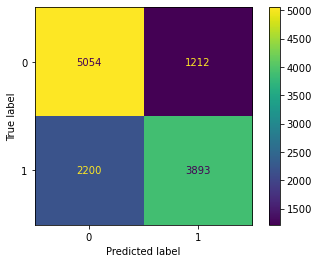

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_train,x_test,y_test)
plt.show()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      6266
           1       0.76      0.64      0.70      6093

    accuracy                           0.72     12359
   macro avg       0.73      0.72      0.72     12359
weighted avg       0.73      0.72      0.72     12359



# Receiver operating characteristic 

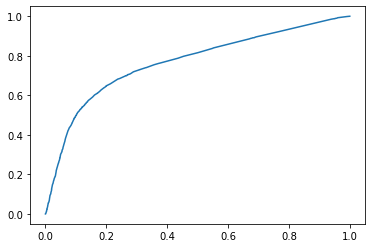

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc=roc_auc_score(y_test,model_train.predict(x_test))
fpr,tpr,thresholds=roc_curve(y_test,model_train.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,logit_roc_auc);

In [27]:
# the threshold is around 45 to 65

In [28]:
from sklearn.metrics import accuracy_score
z=LogisticRegression(class_weight="balanced")
z.fit(x_train,y_train)
THRESHOLD=.49
pred=np.where(z.predict_proba(x_test)[:,1]>THRESHOLD,1,0)
pd.DataFrame(data=[accuracy_score(y_test,pred)],index=["accuracy"])

,0
accuracy,0.724411


# Desicion Tree and Random Forest

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=2)
from sklearn import tree
model_DT=tree.DecisionTreeClassifier(random_state=2)
model_DT_fit=model_DT.fit(x_train,y_train)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix,accuracy_score
acc_list=[]
random_state_list=[]
test_size_list=[]
for g in [.1,.2,.3,.4]:
    for f in range(10):
        x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=g,random_state=f)
    # fit the model with training set and predict the value
        model_DT=tree.DecisionTreeClassifier(random_state=f)
        model_DT_fit=model_DT.fit(x_train,y_train)
        y_pred=model_DT_fit.predict(x_test)
        acc=accuracy_score(y_test,y_pred)
    #calculate the residual 
        acc_list.append(acc)
        random_state_list.append(f)
        test_size_list.append(g)
finallist=pd.DataFrame({'test_size':test_size_list,'random_state':random_state_list,'Accuracy':acc_list})
finallist

,test_size,random_state,Accuracy
0,0.1,0,0.704531
1,0.1,1,0.710841
2,0.1,2,0.708576
3,0.1,3,0.720388
4,0.1,4,0.711327
5,0.1,5,0.707443
6,0.1,6,0.715049
7,0.1,7,0.709223
8,0.1,8,0.717476
9,0.1,9,0.708576


In [31]:
a=finallist["Accuracy"]
a.max()

0.7203883495145631

In [32]:
from sklearn.model_selection import RandomizedSearchCV
parameters={'max_depth':(10,20,30,40,50,60,70,100),'criterion':('gini','entropy'),'max_features':('log2','auto','sqrt'),'min_samples_split':(2,4,6)}
DT_grid=RandomizedSearchCV(tree.DecisionTreeClassifier(),param_distributions=parameters,cv=10)
DT_grid.fit(x_train,y_train)
DT_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=6)

In [33]:
model=tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=6)
y_pred=model_DT_fit.predict(x_test)
confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
acc

0.7059918274871546

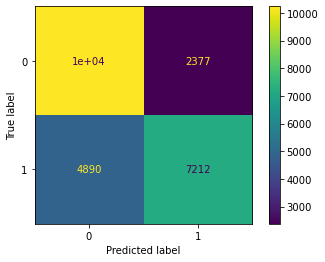

In [34]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_DT_fit,x_test,y_test)
plt.show()

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74     12615
           1       0.75      0.60      0.66     12102

    accuracy                           0.71     24717
   macro avg       0.71      0.70      0.70     24717
weighted avg       0.71      0.71      0.70     24717



In [36]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(random_state=2,n_estimators=200)
model_rf_fit=model_rf.fit(x_train,y_train)
y_pred=model_rf_fit.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[10105,  2510],
       [ 4672,  7430]], dtype=int64)

In [38]:
acc=accuracy_score(y_test,y_pred)
acc

0.7094307561597282

In [39]:
from sklearn.model_selection import RandomizedSearchCV
parameters={'n_estimators':(100,200,300,400,800),'criterion':('gini','entropy'),'max_features':('auto','sqrt'),'min_samples_split':(2,4,6)}
rf_grid=RandomizedSearchCV(RandomForestClassifier(),param_distributions=parameters,cv=5)
rf_grid.fit(x_train,y_train)
rf_grid.best_estimator_

RandomForestClassifier(max_features='sqrt', min_samples_split=6,
                       n_estimators=200)

In [40]:
best_model=RandomForestClassifier(max_features='sqrt', min_samples_split=6,
                       n_estimators=200)
y_pred=model_rf_fit.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[10105,  2510],
       [ 4672,  7430]], dtype=int64)

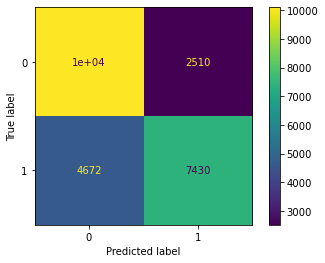

In [41]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_rf_fit,x_test,y_test)
plt.show()

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.80      0.74     12615
           1       0.75      0.61      0.67     12102

    accuracy                           0.71     24717
   macro avg       0.72      0.71      0.71     24717
weighted avg       0.71      0.71      0.71     24717



# Navies Bayes

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_ind,y_dep,test_size=0.2,random_state=3)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB,ComplementNB,CategoricalNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
cm

array([[5100, 1166],
       [2320, 3773]], dtype=int64)

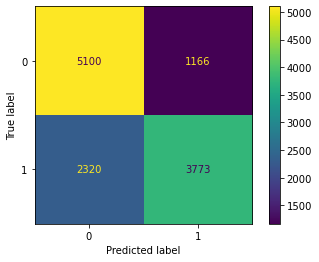

In [45]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,x_test,y_test)
plt.show()

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75      6266
           1       0.76      0.62      0.68      6093

    accuracy                           0.72     12359
   macro avg       0.73      0.72      0.71     12359
weighted avg       0.73      0.72      0.72     12359



# XGBoost

In [50]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

y_dep=data_clean.cardiovascular_disease
x_ind=data_clean.drop("cardiovascular_disease",axis=1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=2)
model =XGBClassifier()
model.fit(x_train,y_train)
predict_train = model.predict(x_train)
predict_test = model.predict(x_test)

[22:01:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


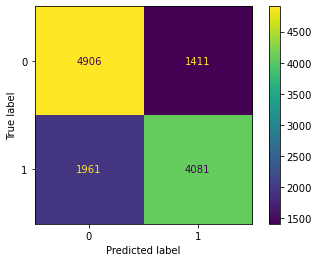

In [51]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6317
           1       0.74      0.68      0.71      6042

    accuracy                           0.73     12359
   macro avg       0.73      0.73      0.73     12359
weighted avg       0.73      0.73      0.73     12359

